<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/Advanced%20Statistical%20Analysis%20Of%20Apple%20Inc.%20Stock%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/Apple Stock Prices (1981 to 2023).csv', encoding='ISO-8859-1')

In [3]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [4]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df['Date'].diff().value_counts()

,count
Date,
1 days,8317
3 days,1927
4 days,265
2 days,95
5 days,2
7 days,1


In [9]:
df['Year'] = df['Date'].dt.year

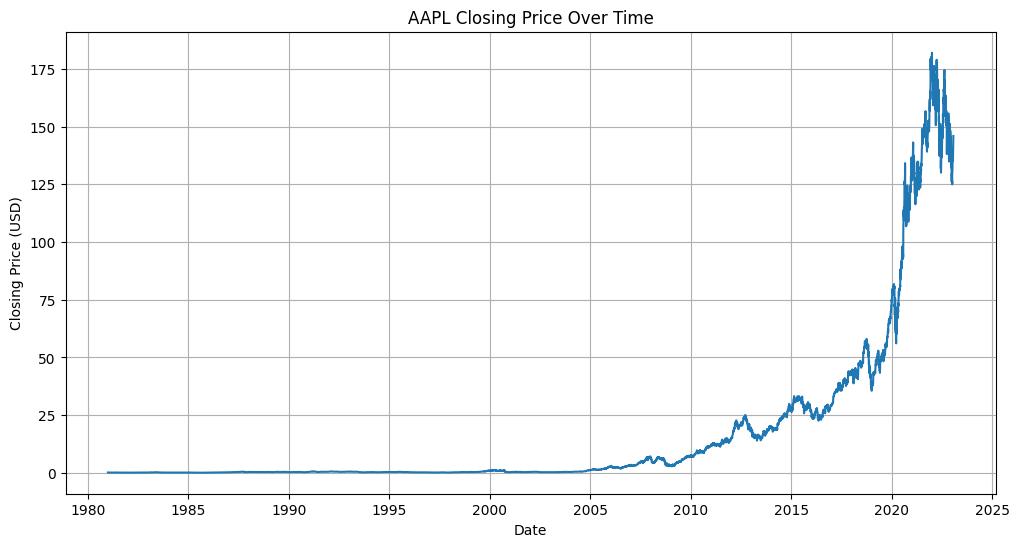

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

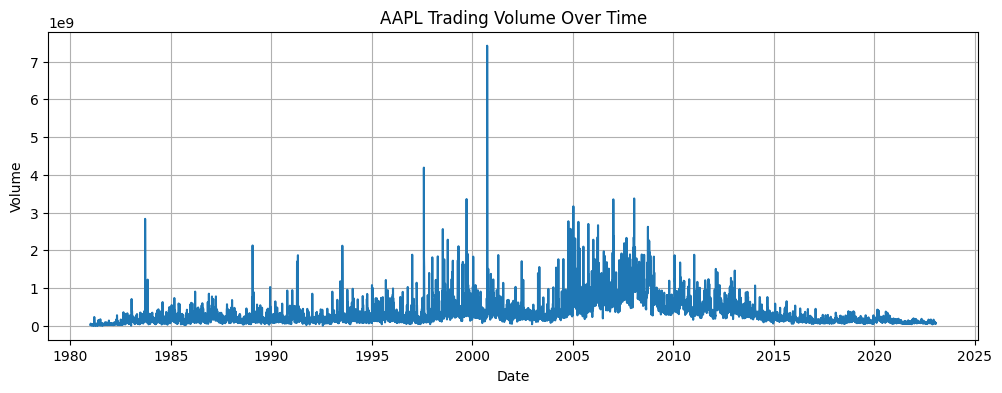

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'])
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [12]:
mean_close = df['Close'].mean()
median_close = df['Close'].median()
std_close = df['Close'].std()

print("Mean:", mean_close)
print("Median:", median_close)
print("Std Dev:", std_close)

Mean: 16.69736201451735
Median: 0.487701
Std Dev: 35.47391163938849


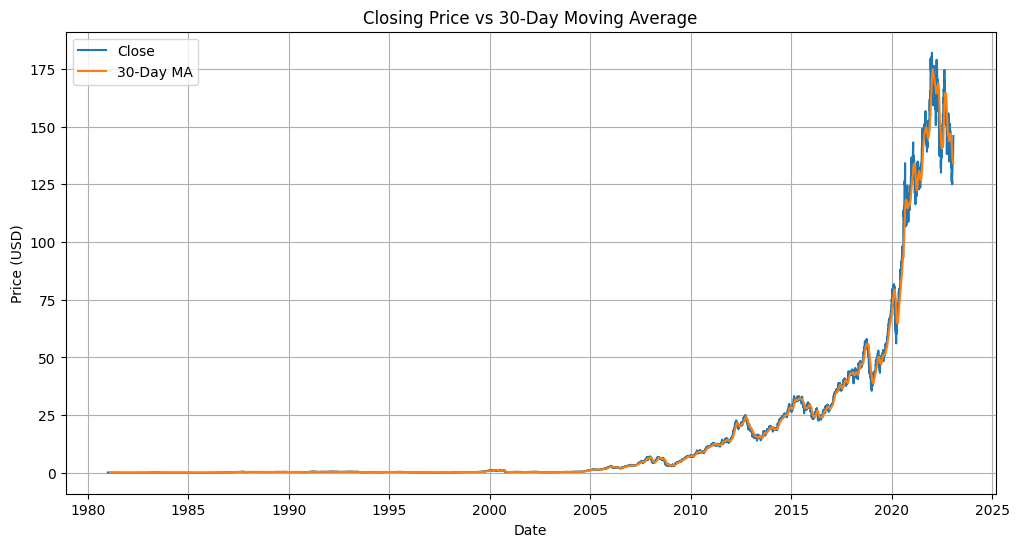

In [16]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA')
plt.title('Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
df['Year'] = df['Date'].dt.year
close_2010 = df[df['Year'] == 2010]['Close']
close_2020 = df[df['Year'] == 2020]['Close']
t_stat, p_val = ttest_ind(close_2010, close_2020, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -62.65011858622042
p-value: 1.9262958452785527e-156


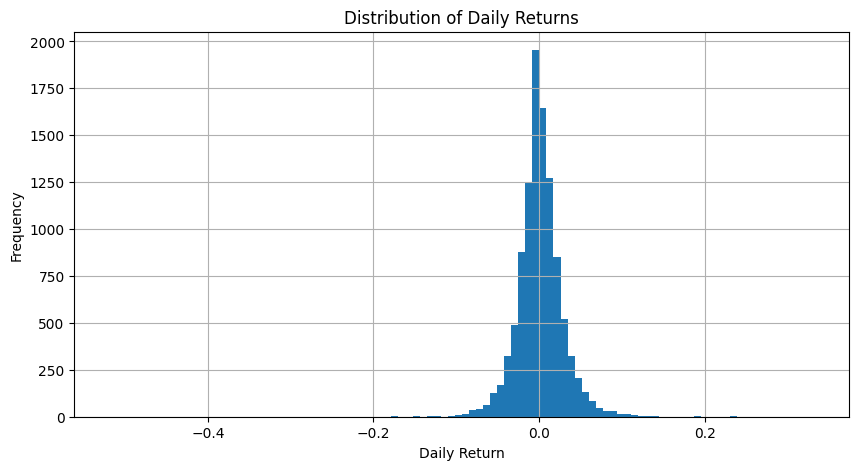

Shapiro-Wilk Statistic: 0.9185766126505677
p-value: 1.5605221777763876e-59


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10578.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
df['Daily Return'] = df['Close'].pct_change()
df.dropna(inplace=True)
plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=100)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
shapiro_test = shapiro(df['Daily Return'].dropna())
print("Shapiro-Wilk Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)


In this project, we analyzed Apple Inc. (AAPL) stock prices from 1981 to 2023.
We began by loading the dataset and examining the data types and time series properties, identifying that the data is recorded on a daily basis.

In the visualization stage, we plotted the closing prices and trading volume over time, and computed a 30-day moving average to smooth out short-term fluctuations in stock prices.

For statistical analysis, we calculated the mean, median, and standard deviation of the closing prices. The mean was significantly higher than the median, indicating a positively skewed distribution, influenced by high stock prices in recent years.

In the hypothesis testing section, we used a t-test to compare closing price averages between different years and found a statistically significant difference. We then computed daily returns and tested for normality using the Shapiro-Wilk test. The results showed a very low p-value (≈ 1.56e-59), indicating that daily returns do not follow a normal distribution — likely due to skewness and heavy tails, which are common in financial data.